<a id='top'></a>

# Restaurant Quest using TomTom API

Where to Open a Chinese Restaurant in Amsterdam?

Partial story ([Full story]()) | **Updated on**: 14 Jan 2020 | **Author**: [Xinrong Ding](https://www.linkedin.com/in/xding/)

### Table of contents
 
[1. Background](#1)<br>
[2. Data requirements](#2)<br>
[3. Analyze Demographic Data](#3)<br>
[4. View candidate neighborhoods on a map](#4)<br>
[5. Explore the surroundings](#5)<br>
[6. In-depth Analysis of One Neighborhood](#6)<br>
[7. Conclusion and future work](#7)

<br>
<hr style="border: 1px solid orange;">

<a id="1"></a>
# 1. Background

This is the virtual challenge I choose to complete an online Data Science course. And I have so much fun tackling the challenge using TomTom Maps API, I would like to share the project with others.

<a id="11"></a>
## 1.1 The challenge

Linda has a dream to open a Chinese restaurant to share the joy of great food with others. Now, everything is ready, she chooses Amsterdam to be the place where her dream takes off. Not only because Amsterdam is one of the most populous and visited cities in Europe but also because the diverse culture the city embraces.

<a id="12"></a>
## 1.2. The approach

The big question is, where to open a Chinese restaurant in Amsterdam. I need to collect data from at least two sources to narrow down the selection:

* Demographic data (for instance: population density per area in Amsterdam)
* Data of the surroundings (for instance: density of similar restaurants nearby)

<a id="13"></a>
## 1.3. About Amsterdam

[Amsterdam](https://en.wikipedia.org/wiki/Amsterdam) is the capital city and most populous municipality of [the Netherlands](https://en.wikipedia.org/wiki/Netherlands). 
Here are some facts about its residences:

* Amsterdam has a population of **854,047** within the city proper
* Amsterdam city proper has **4,457** inhabitants per square kilometer and **2,275** households per square kilometer.
* Amsterdam has more than **100 kilometers (60 miles)** of canals, most of which are navigable by boat.

As to tourism, Amsterdam is one of the most popular tourist destinations in Europe
* Number of international tourists per year: **20.63 million**.
* Out of which, the number of day-trippers is: **16 million**.

_Reference: https://en.wikipedia.org/wiki/Amsterdam_

<a id="14"></a>
## 1.4. Business questions

To find the ideal location for the restaurant, I must first seek answers to a few questions.

### Question 1: How popular will Chinese food be in the neighborhood?

For Linda, it's important to serve traditional Chinese food in same the style in which she learned to first create her dishes. Even though Chinese food is widely loved, it makes sense to double check how existing Chinese restaurants are perceived. I will seek to answer this question using TomTom Maps API.

### Question 2: Who are the target customers and where do they live?

It is going to be a small restaurant (5 to 7 tables) due to the limited investment. The primary income would be takeout and orders made online. From past experience, Linda knows that people who live alone are more likely to buy takeout or use online food ordering apps such as Uber Eats. They are the ideal target customers for her new restaurant. So, I will look for an area with a relatively high density of one-person household. I need demographic information to answer this question.

<br/><a id="2"></a>

<hr style="border: 1px solid orange;"><br/>


# 2. Data requirements
**&#8593;** [Back to top](#top)

My focus point for Linda’s new restaurant is location, location, location… thus, I need to collect data that can help me answer the questions, which falls into two main categories:

* Data of the surroundings (density of similar restaurants nearby)
* Demographic data (per area in Amsterdam)

## 2.1. Data of surroundings<a id="21"></a>

### TomTom Search API:
To find all points of interest (POI) per category around a certain location, I will utilize TomTom Search:

* [**Search API documentations**](https://developer.tomtom.com/search-api/search-api-documentation)
* [**Search API Explorer**](https://developer.tomtom.com/content/search-api-explorer#/Search/get_search__versionNumber__poiSearch__query___ext_)

## 2.2 Demographic data<a id="22"></a>

### Demographic features that are crucial to learn for this project:

* **Total Households**: Number of households in a neighborhood.
  * High number of total households guarantees a solid base of potential customers.
* **Population density**: A more densely populated area means more customers for a restaurant. The unit of population density is **number of people per square kilometer**.
  * On top of total households, this feature tells us how many households there are within a given area. Since people living nearby are more likely target customers, the more densely populated neighborhood is a more ideal choice.
* **One-person Households**: Number of the households that with only one person. 
  * One-person households are perfect target customers, as these individuals are more likely to order takeout and avoid cooking alone.

### Conclude demographic analysis

From studying and analyzing demographic data, I chose 10 out of 65 neighborhoods in Amsterdam. Now, I want to display all of these neighborhoods on a map, to give Linda some visuals so she can make her decision more easily!

<br/><a id="3"></a>

<hr style="border: 1px solid orange;"><br/>

# 3. Analyze Demographic Data
[Back to top](#top)

I selected necessary data from [CBS](https://opendata.cbs.nl/statline/#/CBS/nl/dataset/84286NED/table?ts=1558337871247), as mentioned in [chapter 2.2](#22).<br>
The data is in CSV format.

## 3.1 Load Data to a Dataframe

#### Load necessary libraries

In [17]:
# library to handle data in a vectorized manner
import numpy as np 
# library to load dataframe
import pandas as pd

# Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#### Load the CSV file

In [18]:
df = pd.read_csv('https://dl.dropboxusercontent.com/s/jn66fdiuenopwrl/Amsterdam.csv')
df.head()

,Neighborhood,ID,Total Residences,Total Households,One-person Households,Population Density,Lat,Lon
0,Burgwallen-Oude Zijde,WK036300,4305,3090,2180,12323,52.371946,4.896103
1,Burgwallen-Nieuwe Zijde,WK036301,3930,2835,2000,6881,52.373706,4.889922
2,Grachtengordel-West,WK036302,6385,4110,2570,14261,52.370837,4.885478
3,Grachtengordel-Zuid,WK036303,5350,3410,2140,10303,52.364422,4.894243
4,Nieuwmarkt,WK036304,9765,6485,4285,13741,52.372160,4.900096


In [19]:
df.shape

(65, 8)

#### In total 65 neighborhoods

_There are definitely more neighborhoods in Amsterdam municipality. However, for the sake of this challenge, I decided to focus on the neighborhoods that within or connected to Amsterdam city proper._ 

#### Sort the neighborhoods by the population density

In [20]:
df.sort_values(["Population Density"], axis=0, ascending=False, inplace=True)
df.head()

,Neighborhood,ID,Total Residences,Total Households,One-person Households,Population Density,Lat,Lon
14,Staatsliedenbuurt,WK036314,13315,8105,4860,28139,52.380287,4.870951
19,Van Lennepbuurt,WK036319,6990,4535,3005,28005,52.365144,4.867845
31,Indische Buurt West,WK036331,12640,7060,3930,26985,52.361625,4.938813
21,Overtoomse Sluis,WK036321,7890,4840,2910,26482,52.359468,4.860689
18,Kinkerbuurt,WK036318,6590,3950,2460,26135,52.369167,4.866649


## 3.3. Observe Data using a Bar Chart<a id="33"></a>
[Back to top](#top)

In order to better decide what to do with the data, I want to take a good look at the data. Visualizing the data will help a lot. I choose to use a horizontal bar chart, because I want the neighborhood names to be very easy to read. Due to the number of neighborhoods (65), the vertical bar might not offer enough room to show all the bars.

In [21]:
# step 1: Extract only necessary data
df_visualize = df[["Neighborhood", "Total Households", "One-person Households", "Population Density"]]
df_visualize.head()

,Neighborhood,Total Households,One-person Households,Population Density
14,Staatsliedenbuurt,8105,4860,28139
19,Van Lennepbuurt,4535,3005,28005
31,Indische Buurt West,7060,3930,26985
21,Overtoomse Sluis,4840,2910,26482
18,Kinkerbuurt,3950,2460,26135


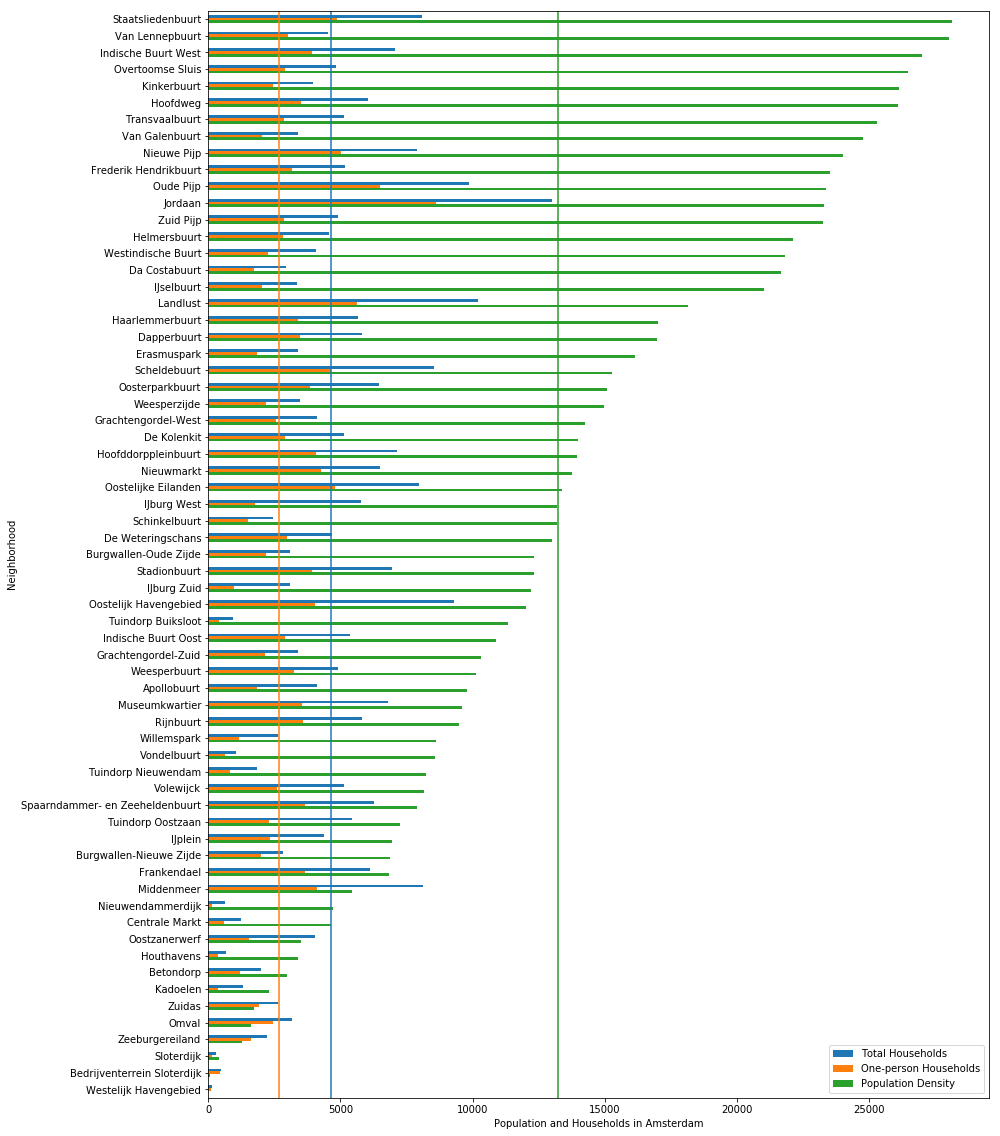

In [22]:
ax = df_visualize.plot(kind='barh', figsize=(14,20))
#ax.set_title('Population and Households in Amsterdam')
ax.set_xlabel('Population and Households in Amsterdam')
ax.set_ylabel('Neighborhood')
ax.invert_yaxis()
ax.set_yticklabels(df['Neighborhood'].values)

rects = ax.patches

# use axvline to mark the average population density
mean = df["Population Density"].mean()
ax.axvline(mean, color='#2B9B2A') #Green

# use axvline to mark the average total households
mean2 = df["Total Households"].mean()
ax.axvline(mean2, color='#1E77B4') #Blue

# use axvline to mark the average one-person households
mean3 = df["One-person Households"].mean()
ax.axvline(mean3, color='#FF7F0F') #Orange

### 3.3.1. Takeaways of the Above Bar Chart<a id="331"></a>
[Back to top](#top)

1. One thing becomes evident is that many neighborhoods in Amsterdam has much lower population density than the average value. These neighborhoods are very unlikely to be ideal location to open the restaurant. Therefore, I should remove them to focus on the neighborhoods that are more densely populated. I will do that in the [next chapter](#34).
2. The second learning is that amongst the more densely populated neighborhoods, not all of them have above average total number of households and one-person households.We will do further analysis in [chapter 3.5](#35) to filter out the neighborhoods that do not have enough one-person households.


## 3.4. Remove Neighborhoods that have below average population density<a id="34"></a>
[Back to top](#top)

In [23]:
#First calculate the average residences of each neighborhood
average_density = int(df["Population Density"].mean())
print("Average population density of Amsterdam city proper is: ", average_density)

Average population density of Amsterdam city proper is:  13233


In [24]:
#Drop all neighborhoods that has a Total Households number below average
#result[result['Value'] ! <= 10]  
df = df[df["Population Density"] > average_density]
df.head()

,Neighborhood,ID,Total Residences,Total Households,One-person Households,Population Density,Lat,Lon
14,Staatsliedenbuurt,WK036314,13315,8105,4860,28139,52.380287,4.870951
19,Van Lennepbuurt,WK036319,6990,4535,3005,28005,52.365144,4.867845
31,Indische Buurt West,WK036331,12640,7060,3930,26985,52.361625,4.938813
21,Overtoomse Sluis,WK036321,7890,4840,2910,26482,52.359468,4.860689
18,Kinkerbuurt,WK036318,6590,3950,2460,26135,52.369167,4.866649


In [25]:
print("Number of neighborhoods that has higher than average population density: ", df.shape[0])

Number of neighborhoods that has higher than average population density:  29


## 3.5. Neighborhoods that Have More One-person Households<a id="35"></a>
[Back to top](#top)

#### Calculate the percentage of one-person households of every neighborhood

In [26]:
#calculate the percentage of one-person households of every neighborhood
df["Percentage of One-person Households"] = round(df["One-person Households"] / df["Total Households"]*10000)/100
df.head()

,Neighborhood,ID,Total Residences,Total Households,One-person Households,Population Density,Lat,Lon,Percentage of One-person Households
14,Staatsliedenbuurt,WK036314,13315,8105,4860,28139,52.380287,4.870951,59.96
19,Van Lennepbuurt,WK036319,6990,4535,3005,28005,52.365144,4.867845,66.26
31,Indische Buurt West,WK036331,12640,7060,3930,26985,52.361625,4.938813,55.67
21,Overtoomse Sluis,WK036321,7890,4840,2910,26482,52.359468,4.860689,60.12
18,Kinkerbuurt,WK036318,6590,3950,2460,26135,52.369167,4.866649,62.28


#### Sorting data frame by Percentage of One-person Households

In [27]:
#sorting data frame by Percentage of One-person Households
df.sort_values(["Percentage of One-person Households"], axis=0, ascending=False, inplace=True) 
df.head()

,Neighborhood,ID,Total Residences,Total Households,One-person Households,Population Density,Lat,Lon,Percentage of One-person Households
6,Jordaan,WK036306,19435,12985,8625,23289,52.374500,4.879491,66.42
19,Van Lennepbuurt,WK036319,6990,4535,3005,28005,52.365144,4.867845,66.26
4,Nieuwmarkt,WK036304,9765,6485,4285,13741,52.372160,4.900096,66.08
24,Oude Pijp,WK036324,14820,9875,6510,23353,52.355216,4.894574,65.92
25,Nieuwe Pijp,WK036325,12325,7905,5015,23998,52.351856,4.897728,63.44


#### Step 1: Extract only necessary data

In [28]:
# step 1: Extract only necessary data
# oph stands for One-person Households
df_oph = df[["Neighborhood", "Percentage of One-person Households"]]
df_oph.head()

,Neighborhood,Percentage of One-person Households
6,Jordaan,66.42
19,Van Lennepbuurt,66.26
4,Nieuwmarkt,66.08
24,Oude Pijp,65.92
25,Nieuwe Pijp,63.44


#### Step 2: plot data

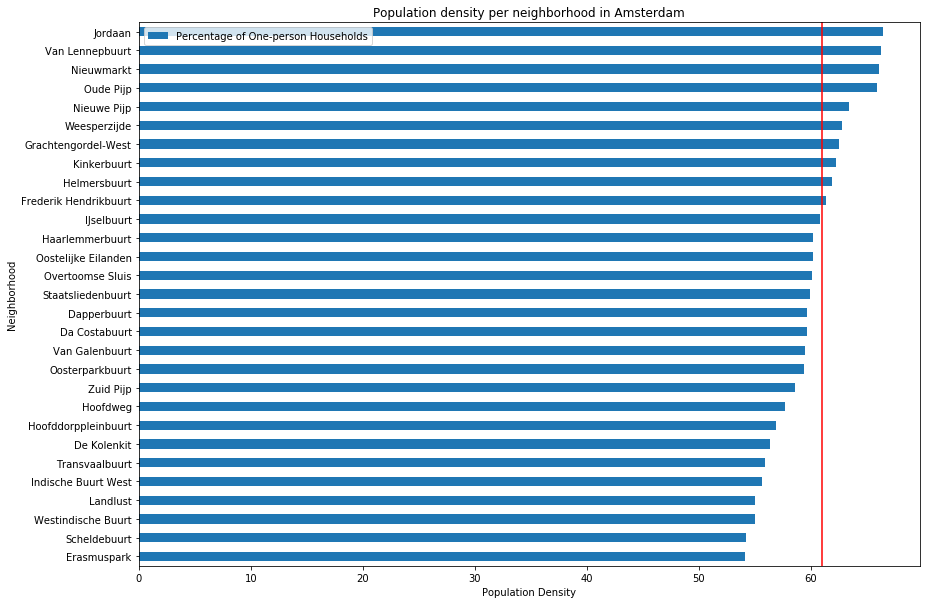

In [29]:
# step 2: plot data
ax = df_oph.plot(kind='barh', figsize=(14,10))
ax.set_title('Population density per neighborhood in Amsterdam')
ax.set_xlabel('Population Density')
ax.set_ylabel('Neighborhood')
ax.invert_yaxis()
ax.set_yticklabels(df_oph['Neighborhood'].values)

rects = ax.patches

ax.axvline(61, color='r')

### 3.5.1. Takeaways of the Above Bar Chart<a id='351'></a>
[Back to top](#top)

As mentioned after I examine the data in a bar chart ([chapter 3.3.1](#331)). It seems that the percentage of one-person households (in comparison to the total number of households) seems to be rather consistent for the neighborhoods that have above average population density.

Now, in the above bar chart, the consistency becomes quite clear.

However, I observe there are roughly 3 ranges of the percentage:

1. High: 66% ~ 67%. The first four neighborhood
2. Medium: 59% ~ 63.5%. 
3. Low: 53% ~ 59%. The last 10 neighborhood

I decided to focus on the **top 10**, the neighborhoods that have **over 61 percent of one-person households** (Marked by the red line in the above bar chart).

In [30]:
df = df[df["Percentage of One-person Households"] > 61.0]
df.shape

(10, 9)

<br/><a id="4"></a>

<hr style="border: 1px solid orange;"><br/>


# 4. View candidate neighborhoods on a map
**&#8593;** [Back to top](#top)

I use these tools to visualize the information I gathered above:
* [TomTom Maps API](https://developer.tomtom.com/products/maps-api?gclid=Cj0KCQiA2ITuBRDkARIsAMK9Q7Mra8DrrcLAR20WH9DDHfOud1XSVeaJzWeyLEG7ebjjaL2LUGoGHhkaAn2rEALw_wcB): map data
* [folium](https://python-visualization.github.io/folium/): map rendering library

### Recap the 10 remaining neighborhoods

In [31]:
df

,Neighborhood,ID,Total Residences,Total Households,One-person Households,Population Density,Lat,Lon,Percentage of One-person Households
6,Jordaan,WK036306,19435,12985,8625,23289,52.374500,4.879491,66.42
19,Van Lennepbuurt,WK036319,6990,4535,3005,28005,52.365144,4.867845,66.26
4,Nieuwmarkt,WK036304,9765,6485,4285,13741,52.372160,4.900096,66.08
24,Oude Pijp,WK036324,14820,9875,6510,23353,52.355216,4.894574,65.92
25,Nieuwe Pijp,WK036325,12325,7905,5015,23998,52.351856,4.897728,63.44
27,Weesperzijde,WK036327,5535,3470,2180,14984,52.357900,4.906300,62.82
2,Grachtengordel-West,WK036302,6385,4110,2570,14261,52.370837,4.885478,62.53
18,Kinkerbuurt,WK036318,6590,3950,2460,26135,52.369167,4.866649,62.28
20,Helmersbuurt,WK036320,7410,4580,2835,22124,52.363360,4.871285,61.90
16,Frederik Hendrikbuurt,WK036316,8435,5160,3165,23520,52.376956,4.874085,61.34


### Install and import folium

In [57]:
#-----install folium map----
#pip install folium==0.9.1 #comment it out if folium is already installed

#----Alterantively, install folium with the following code-------
#!conda install -c conda-forge folium=0.5.0 --yes #install folium

In [33]:
import folium # map rendering library

## 4.1 Use TomTom Search API<a id="41"></a>
**&#8593;** [Back to top](#top)

### Get an API key

Click the "Get Your Key" button in [this page](https://developer.tomtom.com/content/search-api-explorer) to get an API key.

### Load the TomTom API

TomTom API offers multiple APIs, including the Search API. There is no need to load each API separately.

In [34]:
import requests
tomtom_api_keys = ["qTI9oA80m7X6TeWf4qKDjA2UvCy6p5mA"] # max 2500 calls/day
api_key = tomtom_api_keys[0]

### Establishing the map

First, I want to define a function using [Geocoding feature in Search API](https://developer.tomtom.com/content/search-api-explorer#/Geocoding/get_search__versionNumber__geocode__query___ext_) to get lat/lon of the center of a city. In this case, I retrieve the center of Amsterdam so that the map is properly aligned in the view.

In [35]:
# Search for city: 
def SearchCity(api_key,City,Country):
    
    url = 'https://api.tomtom.com/search/2/search/'
    url += City + ', ' + Country
    url += '.json?limit=1&idxSet=Geo&key=' + api_key
    
    result = requests.get(url).json()
    
    GeoID = result['results'][0]['dataSources']['geometry']['id']
    position = result['results'][0]['position']
    
    return GeoID,position

In [36]:
Amsterdam_position = SearchCity(api_key, "Amsterdam", "Netherlands")

In [37]:
lat_amsterdam = Amsterdam_position[1]['lat']
lon_amsterdam = Amsterdam_position[1]['lon']
print(lat_amsterdam, lon_amsterdam)

52.37317 4.89066


### First Impression of the Candidate Neighborhoods

Now, let’s instantiate the visual component, the TomTom map itself, so I can begin displaying neighborhoods.

In [59]:
#Define a function to initialize any map using TomTom map.
def init_map(api_key=api_key, latitude=0, longitude=0, zoom=14, layer = "basic", style = "main"):
    """
    The initialise_map function initializes a clean TomTom map
    """
    
    maps_url = "http://{s}.api.tomtom.com/map/1/tile/"+layer+"/"+style+"/{z}/{x}/{y}.png?tileSize=512&key="
    TomTom_map = folium.Map(
        location = [latitude, longitude],  # on what coordinates [lat, lon] to initialise our map
        zoom_start = zoom,  # with what zoom level to initialize the map, from 0 to 22
        tiles = str(maps_url + api_key),
        attr = 'TomTom')
    
    return TomTom_map

## 4.2. Visualize one feature on the map<a id="42"></a>
**&#8593;** [Back to top](#top)

Let's start from visualizing the number of one-person households on the map to get an impression of the 10 candidate neighborhoods.

In [60]:
#Visualize one feature (number of one-person households) to get an impression of the 10 candidate neighborhoods.
TomTom_map = init_map(latitude=lat_amsterdam, longitude=lon_amsterdam, zoom=13, layer = "hybrid")

# add markers to map
for lat, lon, neighborhood, oph in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['One-person Households']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=oph/25,
        popup=label, 
        color='#FF7F0F', # Orange
        fill=True,
        fill_color='#FF7F0F',
        fill_opacity=0.3).add_to(TomTom_map)
TomTom_map.save('01_demographic.html')
TomTom_map

## 4.3. Visualize more features on the map<a id="43"></a>
**&#8593;** [Back to top](#top)

The above map gives us an impression of how many one-person households actually exist in each neighborhood.

Now, let's add two more features to the map, so there are three features in total:

1. **Orange circles** represent the number of one-person households.
2. **Blue circles** represent the number of households in total.
3. **Green circles** represent the population density.

Important notes about these circles:

* The center of the orange, green, and blue circles is the center of the neighborhood. Click the center of the circles to see the name of the neighborhood.
* The radius of each circle represents the number of each feature.

In order to show a more zoomed in map view, I re-adjust the center of the map.

### Re-adjust the center of the map using an address

Based on the previous map visualization, I can see a better center for further analysis is the address: Prinsengracht 745A Amsterdam.

In [40]:
url = "https://api.tomtom.com/search/2/geocode/Prinsengracht 745A Amsterdam.json?countrySet=NL&key=" + api_key
result = requests.get(url).json()

In [41]:
lat_center = result['results'][0]['position']['lat']
lon_center = result['results'][0]['position']['lon']
print(lat_center, lon_center)

52.36425 4.88628


### Draw the Map with One-person Households, Total Households, and Population Density.

In [42]:
TomTom_map = init_map(latitude=lat_center, longitude=lon_center, zoom=14, layer = "hybrid")

# add markers that represent one-person households to the map
for lat, lon, neighborhood, oph in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['One-person Households']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=oph/25,
        popup=label,
        color='#FF7F0F', # Orange
        fill=True,
        fill_color='#FF7F0F', 
        fill_opacity=0.3
    ).add_to(TomTom_map)

# add markers that represent total households to the map
for lat, lon, neighborhood, households in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['Total Households']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=households/25,
        popup=label,
        color='#1E77B4', # Blue
        fill=False
    ).add_to(TomTom_map)
    
# add markers that represent population density to the map
for lat, lon, neighborhood, density in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['Population Density']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=density/100,
        popup=label,
        color='#2A9E2A', # Green
        fill=False
    ).add_to(TomTom_map)
TomTom_map.save('02_demographic.html')
TomTom_map

### Learnings from the above data visualization

As you can see, when choosing an ideal location to open the Chinese restaurant:

* **The bigger the green circles the better.**
* **The less difference between the size of the blue circles and the orange circles the better.**

## 4.4. Conclusion and Next Step<a id='44'></a>
**&#8593;** [Back to top](#top)

Based the above analysis, I have chosen **10** out of **65** neighborhoods in Amsterdam city proper as the candidate neighborhoods for us to investigate further.

**The next step**, covered in the next chapter, will be to further analyze the **10** neighborhoods by looking into **the density of Chinese restaurants** in each. This will help me narrow down Linda’s choices for the best exact location for her new restaurant.

<br/><a id="5"></a>

<hr style="border: 1px solid orange;"><br/>

# 5. Explore the surroundings
**&#8593;** [Back to top](#top)

(Add description of TomTom Search API)

Now, I know where the remaining 10 neighborhoods locate and their geo-relationship. It's time to explore the surroundings. In the scope of the project, I will focus on only question to demonstrate the methodology:

 * How many Chinese restaurants are already available in each neighborhood?

## 5.1. How many Chinese restaurants are already available in each neighborhood?<a id="51"></a>

Use the [Search API explorer](https://developer.tomtom.com/content/search-api-explorer#/Search/get_search__versionNumber__categorySearch__query___ext_) to get the url. I choose to store all search results in a JSON file.

Some key variables:

* Search radius: **radius**
* Maximum number of search results: **limit**

In [43]:
search_radius = 3000
search_limit = 2000

In [44]:
url = ('https://api.tomtom.com/search/2/categorySearch/Chinese restaurant.json?countrySet=NL'
       +'&lat=52.364250&lon=4.886280&limit=2000&radius=3000&key=' + api_key)
result = requests.get(url).json()
#result

### One of the search results in the JSON file.

In [45]:
{'type': 'POI',
   'id': 'NL/POI/p0/109857',
   'score': 5.14904,
   'dist': 150.32529954911772,
   'info': 'search:ta:528009005857203-NL',
   'poi': {'name': 'Taste Of Culture',
    'phone': '+(31)-(20)-4271136',
    'categorySet': [{'id': 7315012}],
    'url': 'www.tasteofculture.net',
    'categories': ['chinese', 'restaurant'],
    'classifications': [{'code': 'RESTAURANT',
      'names': [{'nameLocale': 'en-US', 'name': 'chinese'},
       {'nameLocale': 'en-US', 'name': 'restaurant'}]}]},
   'address': {'streetNumber': '139HS',
    'streetName': 'Korte Leidsedwarsstraat',
    'municipalitySubdivision': 'Amsterdam',
    'municipality': 'Amsterdam',
    'countrySubdivision': 'North Holland',
    'postalCode': '1017',
    'extendedPostalCode': '1017PZ',
    'countryCode': 'NL',
    'country': 'Netherlands',
    'countryCodeISO3': 'NLD',
    'freeformAddress': 'Korte Leidsedwarsstraat 139HS, 1017PZ, Amsterdam',
    'localName': 'Amsterdam'},
   'position': {'lat': 52.36311, 'lon': 4.88509},
   'viewport': {'topLeftPoint': {'lat': 52.36401, 'lon': 4.88362},
    'btmRightPoint': {'lat': 52.36221, 'lon': 4.88656}},
   'entryPoints': [{'type': 'main',
     'position': {'lat': 52.36305, 'lon': 4.885}}]},

({'type': 'POI',
  'id': 'NL/POI/p0/109857',
  'score': 5.14904,
  'dist': 150.32529954911772,
  'info': 'search:ta:528009005857203-NL',
  'poi': {'name': 'Taste Of Culture',
   'phone': '+(31)-(20)-4271136',
   'categorySet': [{'id': 7315012}],
   'url': 'www.tasteofculture.net',
   'categories': ['chinese', 'restaurant'],
   'classifications': [{'code': 'RESTAURANT',
     'names': [{'nameLocale': 'en-US', 'name': 'chinese'},
      {'nameLocale': 'en-US', 'name': 'restaurant'}]}]},
  'address': {'streetNumber': '139HS',
   'streetName': 'Korte Leidsedwarsstraat',
   'municipalitySubdivision': 'Amsterdam',
   'municipality': 'Amsterdam',
   'countrySubdivision': 'North Holland',
   'postalCode': '1017',
   'extendedPostalCode': '1017PZ',
   'countryCode': 'NL',
   'country': 'Netherlands',
   'countryCodeISO3': 'NLD',
   'freeformAddress': 'Korte Leidsedwarsstraat 139HS, 1017PZ, Amsterdam',
   'localName': 'Amsterdam'},
  'position': {'lat': 52.36311, 'lon': 4.88509},
  'viewport': {'t

I can learn from the above JSON file that the following information is essential to show Chinese Restaurants on the map:

* Get lat lon from:**'position': {'lat': 52.36311, 'lon': 4.88509},**
* Get name from: **'poi': {'name': 'Taste Of Culture',**

**Now, let's show these restaurants.**

## 5.2. Show Chinese restaurants on the map<a id="52"></a>
**&#8593;** [Back to top](#top)

Use the position and name information extracted from the JSON file to show POIs on the map.

In [46]:
# add a grey circle to represent the search radius
folium.Circle(
    [lat_center, lon_center],
    radius=search_radius,
    color='#004B7F', # Navy
    opacity=0.3,
    fill = False
).add_to(TomTom_map)

# Add POIs one by one to the map
for poi in result['results']:
    folium.Marker(location=tuple(poi['position'].values()),
                  popup=str(poi['poi']['name']), 
                  icon=folium.Icon(color='blue', icon='glyphicon-star')
                  #icon=icon
             ).add_to(TomTom_map)
TomTom_map.save('03_ChineseRestaurants.html')
TomTom_map

#### Legends of the above map

1. **Blue markers**: Chinese restaurants.
2. **Orange circles**: the number of one-person households.
3. **Blue circles**: the number of households in total.
4. **Green circles**: the population density.
5. **Grey circle**: the search radius.

## 5.3. Cluster the POIs<a id="53"></a>
**&#8593;** [Back to top](#top)

What I would really like to do is have a more obvious visual as to the number of Chinese restaurants in the area. Clustering the POIs (Point of Interests) might help this.

In [47]:
from folium.plugins import MarkerCluster

In [61]:
#------IMPORTANT: Reinitiate the TomTom_map, so that the POI pins won't remain in the map--------
TomTom_map = init_map(latitude=lat_center, longitude=lon_center, zoom=14, layer = "hybrid")

# add markers that represent one-person households to the map
for lat, lon, neighborhood, oph in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['One-person Households']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=oph/25,
        popup=label,
        color='#FF7F0F', # Orange
        fill=True,
        fill_color='#FF7F0F', 
        fill_opacity=0.3
    ).add_to(TomTom_map)

# add markers that represent total households to the map
for lat, lon, neighborhood, households in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['Total Households']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=households/25,
        popup=label,
        color='#1E77B4', # Blue
        fill=False
    ).add_to(TomTom_map)
    
# add markers that represent population density to the map
for lat, lon, neighborhood, density in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['Population Density']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=density/100,
        popup=label,
        color='#2A9E2A', # Green
        fill=False
    ).add_to(TomTom_map)
    
#----------------END of the reinitiation of TomTom_map------------



#--------------Show POIs in Clusters rather than POI pins on the map------------

# Define the marker cluster
mc = MarkerCluster()

# add a grey circle to represent the search radius
folium.Circle(
    [lat_center, lon_center],
    radius=search_radius,
    color='#004B7F', # Navy
    opacity=0.3,
    fill = False
).add_to(TomTom_map)

# Add POIs one by one to the map
for poi in result['results']:
    mc.add_child(
        folium.Marker(
            location=tuple(poi['position'].values()),
            popup=str(poi['poi']['name'])
    ))

TomTom_map.add_child(mc)
TomTom_map.save('04_POI_Clustered.html')
TomTom_map

Zoom in and out the map to observe how the clusters react.

### Key Takeaways

Now that I have investigated options for Linda through multiple filters and criteria, **I can conclude**:

* There must be at least one existing Chinese restaurant in or near the neighborhood.<br>
If there isn’t at least one Chinese restaurant, it might mean that **there is not enough demand**.<br>
Opening a Chinese restaurant without understanding why there are no any could be a risk for Linda.
* There cannot be more than 10 existing Chinese restaurants in the neighborhood, in order to mitigate competition for her. <br>
**Linda wants to stand out!!**

If I apply the criteria, from the above map, I can exclude these neighborhoods:

* Too many existing Chinese restaurants
  * Nieuwmarkt
* No existing Chinese restaurant in or near the neighborhood
  * Weesperzijde
  * Frederik Hendrikbuurt
  * Grachtengordel-West
  * Nieuwe Pijp
  
### The remaining neighborhoods left for Linda to choose from:
* Jordaan
* Van Lennepbuurt
* Oude Pijp
* Kinkerbuurt
* Helmersbuurt

<br/><a id="6"></a>

<hr style="border: 1px solid orange;"><br/>

# 6. In-depth analysis of one neighborhood
**&#8593;** [Back to top](#top)

Let's use **_Jordaan_** as an example to show how I look into one particular candidate neighborhood.

## 6.1. Draw the area of the neighborhood on the map<a id="61"></a>

In [49]:
area_name = 'Jordaan'

Define a function to get polygon of a given GeoID.

In [50]:
# get polygon of GeoID: 
def getPolygon(api_key,GeoID,zoomLevel):
    
    url = 'https://api.tomtom.com/search/2/additionalData.json?geometries=' + GeoID
    url += '&geometriesZoom=' + str(zoomLevel)
    url += '&key=' + api_key
    
    result = requests.get(url).json()    
    GeoJson = result['additionalData'][0]['geometryData']
    
    return GeoJson

In [51]:
# Search City:
GeoID, position = SearchCity(api_key, area_name ,'Amsterdam')

In [52]:
lat_area = position['lat']
lon_area = position['lon']
print("The center of the neighborhood is: (", lat_area, ", ", lon_area, ")")

The center of the neighborhood is: ( 52.37329 ,  4.87992 )


### Create a polygon and add it to the map

In [63]:
# Get Polygon of city:
Polygon = getPolygon(api_key,GeoID,22)

map_url = 'http://{s}.api.tomtom.com/map/1/tile/basic/main/{z}/{x}/{y}.png?view=Unified&key=' + api_key

TomTom_map = folium.Map(
   location=[lat_area, lon_area],
   zoom_start=14,
   tiles= map_url,
   attr='TomTom')

# add polygons to a map
folium.GeoJson(
    Polygon).add_to(TomTom_map)

TomTom_map.save('05_Area.html')
TomTom_map

## 6.2. Show Chinese restaurants in the neighborhood<a id="62"></a>
**&#8593;** [Back to top](#top)

### Search for the Chinese restaurant using the search API

Set the search radius to 1.2 km to cover the entire neighborhood.

In [55]:
url = ('https://api.tomtom.com/search/2/categorySearch/Chinese restaurant.json?countrySet=NL'
       +'&lat=52.37329&lon=4.87992&limit=2000&radius=1200&key=' + api_key)
result = requests.get(url).json()
#result

In [56]:
# add a grey circle to represent the search radius
folium.Circle(
    [lat_area, lon_area],
    radius=1200,
    color='#004B7F', # Navy
    opacity=0.3,
    fill = False
).add_to(TomTom_map)

# Add POIs one by one to the map
for poi in result['results']:
    folium.Marker(location=tuple(poi['position'].values()),
                  popup=str(poi['poi']['name']), 
                  icon=folium.Icon(color='blue', icon='glyphicon-star')
                  #icon=icon
             ).add_to(TomTom_map)
TomTom_map.save('06_Area_POI.html')
TomTom_map

#### Legends of the above map

1. **Blue markers**: Chinese restaurants.
2. **Blue area**: The shape of the neighborhood
3. **Grey circle**: the search radius.

### Takeaways from this map

1.	According to **[TomTom Maps API](https://developer.tomtom.com/products/maps-api?gclid=Cj0KCQiA2ITuBRDkARIsAMK9Q7PaNwgDOLImQcoaRN8mHEJ9bcBuNg_UEH3S5Ybk2tlVj-kQNJILIWAaAkYIEALw_wcB)**, there are more than 20 Chinese Restaurants within the range of 500 meters of the neighborhood Jordaan.
2.	From the map I learn that the west of Jordaan seems to be void of Chinese restaurants. If Linda opens a Chinese restaurant there, she will likely have enough customers.


## 6.3. Repeat!<a id="63"></a>
**&#8593;** [Back to top](#top)

At this point, I would advise Linda to repeat this in-depth examination for each neighborhood she is considering. I could also adjust the details. I consider to include other venues, for example – looking at the number of cafes, snack bars, etc present in an area in addition to regular restaurants.

<br/><a id="7"></a>

<hr style="border: 1px solid orange;"><br/>

# 7. Conclusion and future work
**&#8593;** [Back to top](#top)

## The limitation of this project

### Only focus on residential information

This project is limited by the lack of crucial information. So far I have been focused quite a lot on residence information and one-person households. However, customers can also come from nearby business venues. I am unable to validate any assumption or answer any questions, because the information of business venues in Amsterdam is not as available as demographic information.

### Rent of a venue is not taken into consideration

Due to lack of information, I am unable to include rental price as part of the analysis. Cost could be a big factor for Linda. In order to be able to predict the potential profit, however, it is crucial to include potential rental price.

### Explore more POI categories

There are other facilities in the neighborhood which may influence the income of the restaurant. For instance:

* **How easy is it to reach the place via public transportation?**<br>
Search for nearby bus stops, tram stations, train stations, etc.
* **How easy is it to park your car in the neighborhood?**<br>
Search for nearby parking garages or open parking places.


## Next steps for Linda

* Continue to perform the same in-depth analysis to all neighborhoods as I did in [In-depth analysis of one neighborhood](#5).
* Include rental price of each neighborhood in future analysis to be informed about her costs to profit ratio.

<div class="" style="margin-top: 150px">
</div>